Cargar, limpiar y filtrar el CSV



In [1]:
import pandas as pd
import numpy as np



In [16]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving listings_Mexico.csv to listings_Mexico.csv


{'listings_Mexico.csv': b'host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,beds,price,maximum_nights_avg_ntm,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month\r\nN/A,N/A,1,2,1,"$4,044.00",7,363,0,,,,,,,,\r\n92%,92%,13,14,8,"$18,000.00",365,357,64,4.58,4.56,4.7,4.87,4.78,4.98,4.48,0.4\r\n100%,56%,4,4,2,"$2,123.00",30,343,50,4.9,4.82,4.76,4.94,4.92,4.98,4.92,0.31\r\n100%,94%,4,2,1,"$1,236.00",180,285,131,4.91,4.91,4.96,4.96,4.98,4.96,4.92,0.84\r\nN/A,N/A,4,2,,,730,0,0,,,,,,,,\r\n97%,97%,8,16,10,"$4,056.00",365,218,367,4.88,4.92,4.84,4.92,4.9,4.75,4.91,2.25\r\n100%,75%,2,2,1,$340.00,90,302,111,4.83,4.86,4.61,4.98,4.95,4.96,4.81,0.85\r\n100%,96%,8,2,1,"$1,777.00",1125,359,54,4.81,4.89,4.74,4.91,4.89,4.91,4.74,0.35\r\n100%,82%,7,7,6,"$4,985.00",30,117,26,4.92,4.92,4.96,5,4.84,4.88,4.88,0.17\r\n100%

In [17]:
# Cargar el archivo CSV de extracción de características
file_path = "listings_Mexico.csv"
df = pd.read_csv(file_path)

In [18]:
# Convertir columnas que representan porcentajes a formato numérico
df["host_response_rate"] = df["host_response_rate"].str.rstrip("%").astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float)

In [19]:
# Convertir la columna de precio eliminando el símbolo "$" y las comas
df["price"] = df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [20]:
# Seleccionar únicamente las columnas numéricas
df_num = df.select_dtypes(include=[np.number]).copy()

In [21]:
# Eliminar filas que contengan valores nulos
df_num = df_num.dropna()

In [22]:
# Guardar el CSV con los datos filtrados
df_num.to_csv("Mexico-filtrado-catego.csv", index=False)



Aplicar la Regla de Sturges para determinar el número de bins

In [23]:
# Función para calcular el número de bins usando la Regla de Sturges
def sturges_rule(n):
    return int(np.ceil(1 + np.log2(n)))



In [24]:
# Calcular el número de bins para el dataset filtrado
num_bins = sturges_rule(len(df_num))
print("Número de bins según la Regla de Sturges:", num_bins)


Número de bins según la Regla de Sturges: 16


Graficar las frecuencias de las variables numéricas

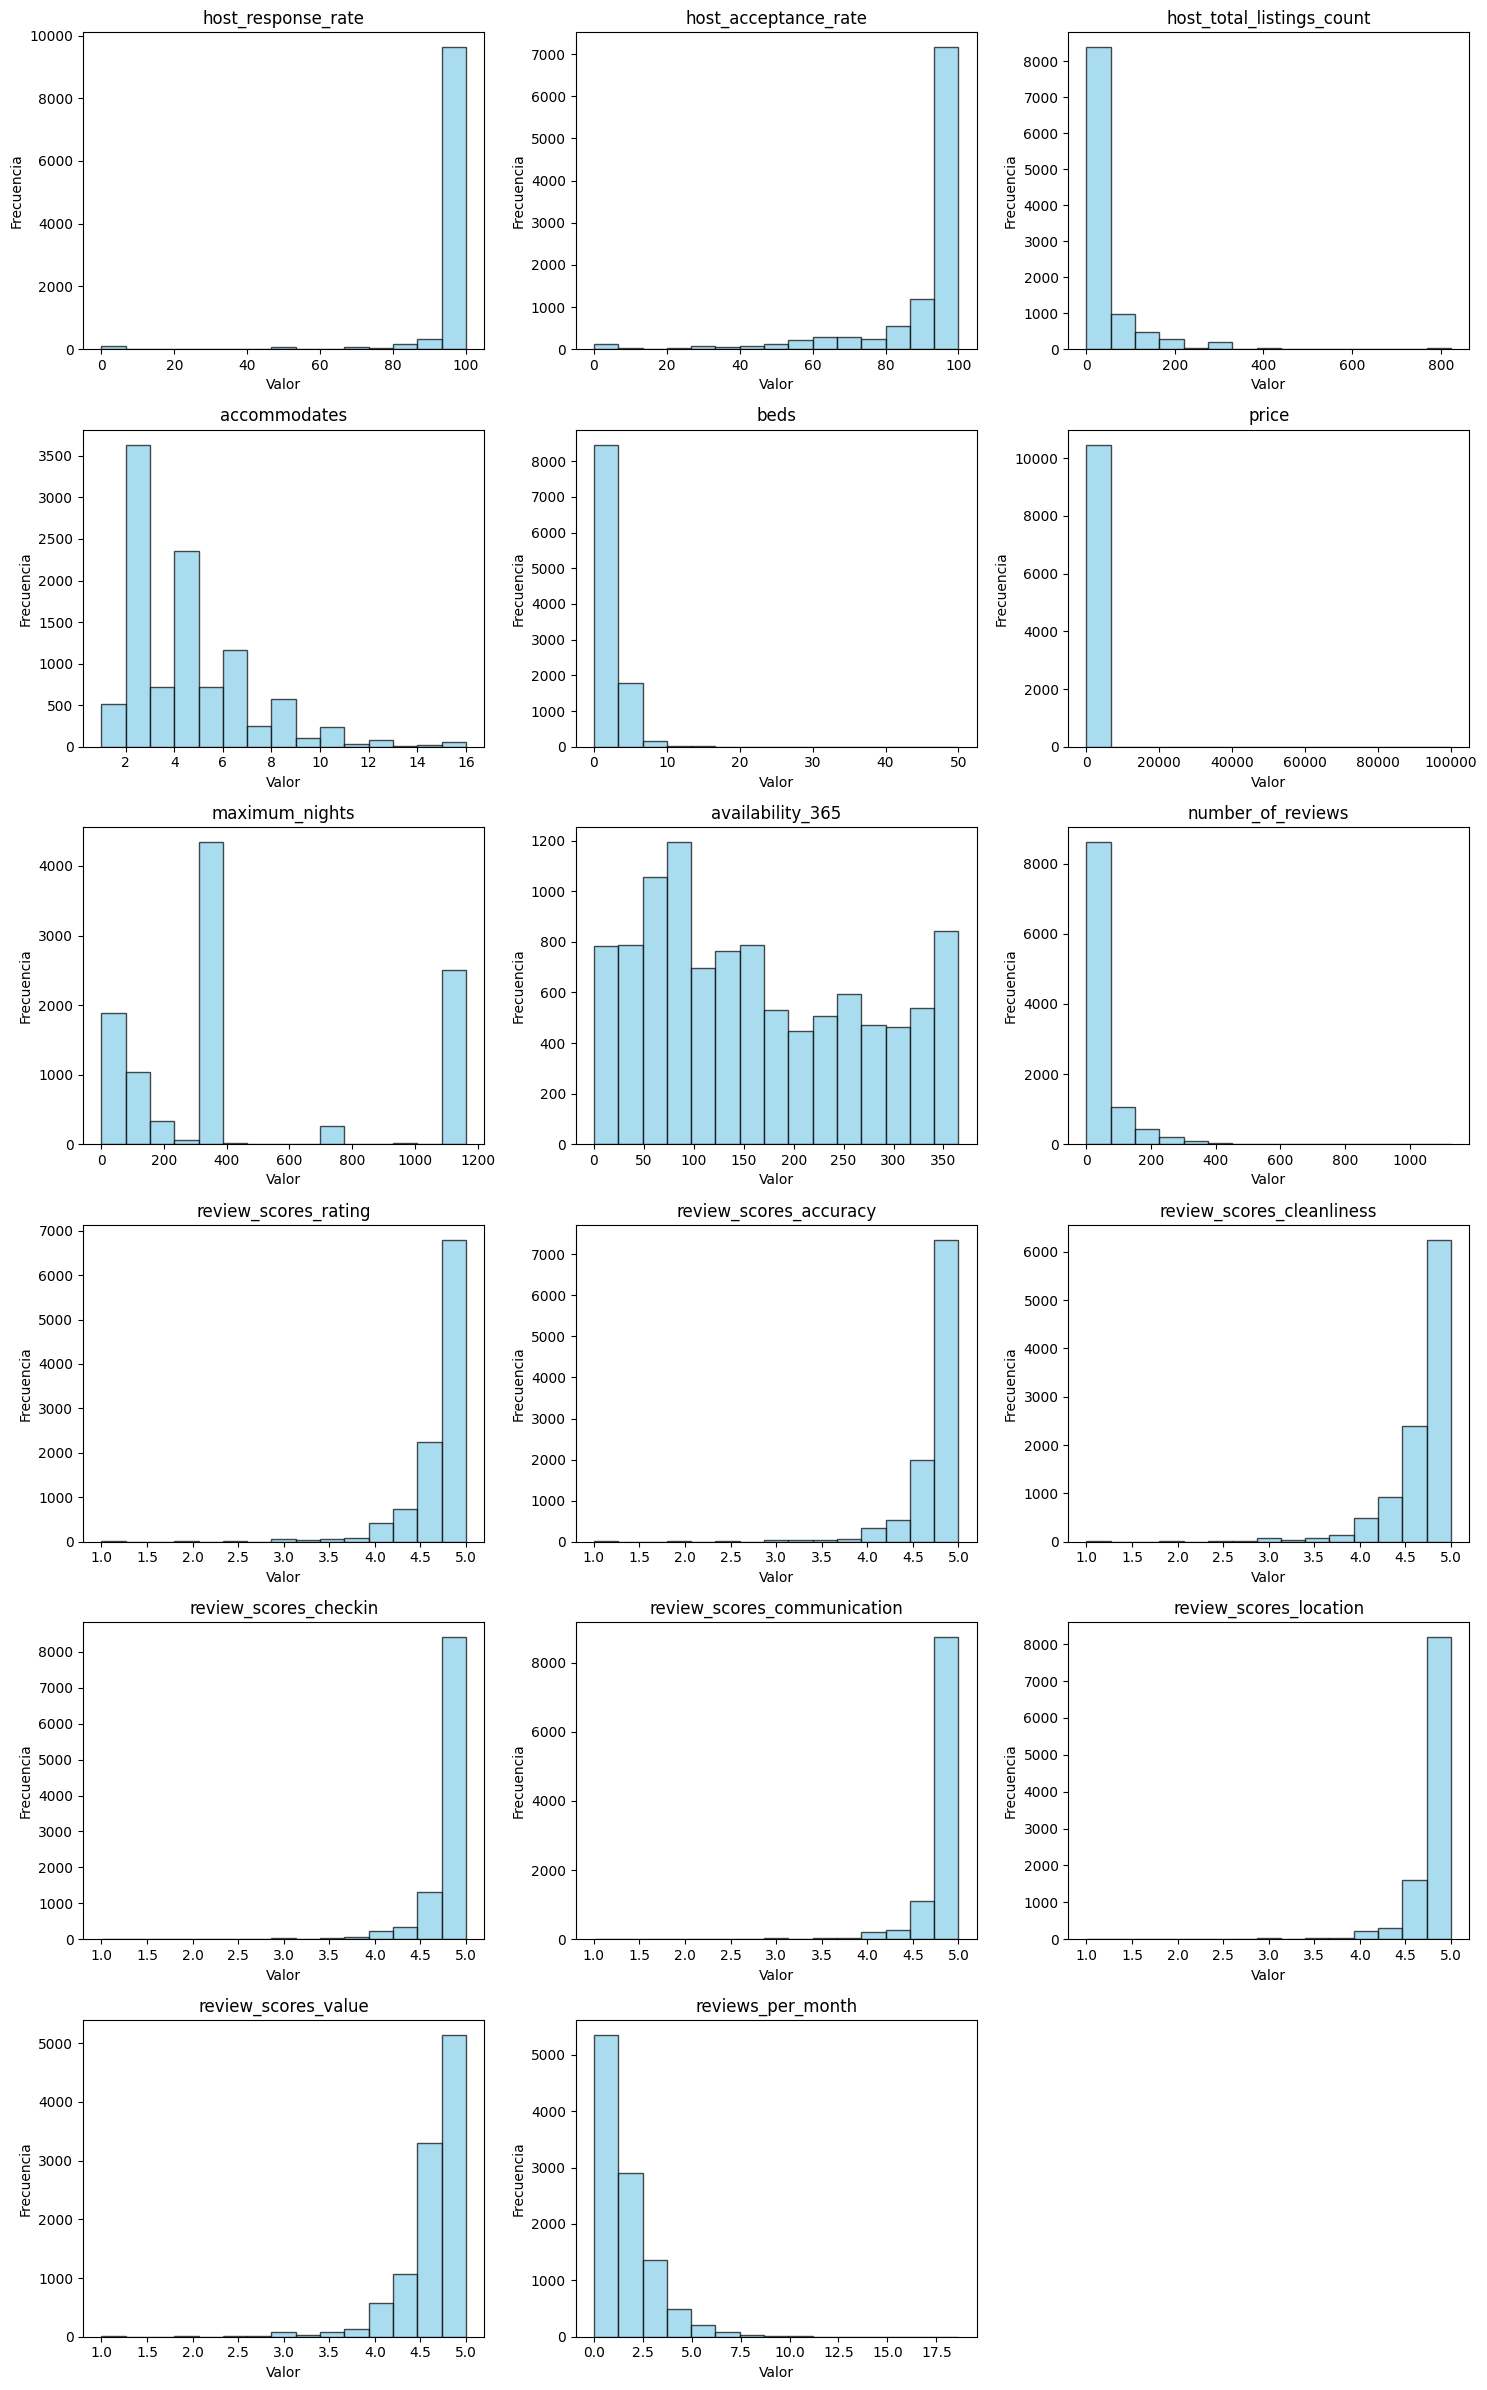

In [15]:
import matplotlib.pyplot as plt

# Crear histogramas para cada variable numérica usando el número de bins obtenido
# Ajustamos el número de subplots en función de la cantidad de columnas numéricas
n_cols = 3
n_rows = int(np.ceil(len(df_num.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    df_num[col].plot(kind="hist", bins=num_bins, ax=axes[i], alpha=0.7,
                     color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].set_xlabel("Valor")

# Si quedan subplots vacíos, los eliminamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
